In [1]:
# Activate the julia environment in the working directory. 
using Pkg 
Pkg.activate(".")    # See Project.toml for packages loaded. 
Pkg.instantiate() 
Pkg.precompile() 

# Load packages used here.
using Downloads, HTTP, DataFrames, ZipFile, CSV, Plots, CategoricalArrays, Pipe, StatsBase, Dates, ShiftedArrays

# Inculde pre-written utility files. 
include("ATUSDownload.jl")

  Activating project at `~/Documents/Personal Stuff/Repos/DoingRightNow-Analysis`


download_atus_data

# Examine the Respondent file

Information on ATUS files can be found [here](https://www.bls.gov/tus/data/datafiles-2021.htm). A PDF of the data dictionary can be found [here](https://www.bls.gov/tus/dictionaries/atusintcodebk21.pdf). A general user guide PDF can be found [here](www.bls.gov/tus/atususersguide.pdf). 
 
We'll start by looking at the Respondent file for
2021. Here's detail on the file from the ATUS website.
 
> About the Basic ATUS Data Files: 
> ATUS Respondent File 
> This file contains case-specific variables collected in ATUS (that is, variables for which there is one value for each respondent). These include, for example, labor force and earnings information, total time providing secondary childcare, and ATUS statistical weights. 
>  
> There is one record for each ATUS respondent. 
>  
> Below is a simplified example. The variable TUCASEID identifies each household, and the variable TULINENO identifies each individual within the household. The example contains responses from five individuals; note that the respondent always has TULINENO = 1. In the example, each respondent has a corresponding statistical weight for use in generating estimates representative of the U.S. civilian, noninstitutionalized population (TUFINLWGT), and values for school enrollment (TESCHENR), labor force status (TELFS), and total number of minutes spent alone on the diary day (TRTALONE). The actual ATUS Respondent file contains more variables and records. 
 
| TUCASEID       | TULINENO | TUFINLWGT   | TESCHENR | TELFS | TRTALONE | 
|----------------|----------|-------------|----------|-------|----------| 
| 20060101020210 | 1        | 22261358.19 | 1        | 1     | 40       | 
| 20060101020211 | 1        | 5019645.31  | 1        | 1     | 350      | 
| 20060101020212 | 1        | 2926068.74  | 1        | 5     | 0        | 
| 20060101020213 | 1        | 25780574.07 | 2        | 5     | 556      | 
| 20060101020214 | 1        | 3414645.94  | 1        | 4     | 100      | 


This is information about our population. So this is a good place to start. 
 
The 
 
There are some coded values we'll need to process. Specifically: 
-1
-2
-3

Weighting can be used for averages in the following manner. 
 
Let $\overline{T_j}$ be average time spend on activity $j$. This can be calculated as follows 
 
$$ 
\overline{T_j} = \frac{ \sum_i fwgt_i T_{ij} }{ \sum_i fwgt_i } 
$$ 
 
where $fwgt_i$ is teh 

Now let's pull the data and start looking at the population. 
 
I've already created a function 

In [2]:
resp2021 = download_atus_data("resp",2021) 
first(resp2021,10)

Row,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,TEERNPER,TEERNRT,TEERNUOT,TEERNWKP,TEHRFTPT,TEHRUSL1,TEHRUSL2,TEHRUSLT,TEIO1COW,TEIO1ICD,TEIO1OCD,TELAYAVL,TELAYLK,TELFS,TELKAVL,TELKM1,TEMJOT,TERET1,TESCHENR,TESCHFT,TESCHLVL,TESPEMPNOT,TESPUHRS,TRCHILDNUM,TRDPFTPT,TRDTIND1,TRDTOCC1,TRERNHLY,TRERNUPD,TRERNWA,TRHERNAL,TRHHCHILD,TRHOLIDAY,TRIMIND1,TRMJIND1,TRMJOCC1,TRMJOCGR,TRNHHCHILD,TRNUMHOU,TROHHCHILD,TRSPFTPT,TRSPPRES,TRTALONE,TRTALONE_WK,TRTCC,TRTCCC,TRTCCC_WK,TRTCCTOT,TRTCHILD,TRTCOC,TRTEC,TRTFAMILY,TRTFRIEND,TRTHH,TRTHHFAMILY,TRTNOCHILD,TRTNOHH,TRTO,TRTOHH,TRTOHHCHILD,TRTONHH,TRTONHHCHILD,TRTSPONLY,TRTSPOUSE,TRTUNMPART,TRWERNAL,TRYHHCHILD,TTHR,TTOT,TTWK,TUABSOT,TUBUS,TUBUS1,TUBUS2OT,TUBUSL1,TUBUSL2,TUBUSL3,TUBUSL4,TUCC2,TUCC4,TUCC5B_CK,TUCC5_CK,TUCC9,TUDIARYDATE,TUDIARYDAY,TUDIS,TUDIS1,TUDIS2,TUECYTD,TUELDER,⋯
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String15,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,⋯
1,20210101210037,1,2021,1,-1,-1,1290,-1,40,1,1,-1,2,-1,-1,40,-1,40,4,4870,4720,-1,-1,1,-1,-1,2,-1,-1,-1,-1,-1,-1,0,1,22,16,1290,0,51600,0,2,0,7,5,4,3,2,1,2,-1,3,450,450,0,0,540,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,20210128,5,-1,-1,-1,-1,2,⋯
2,20210101210081,1,2021,1,-1,-1,1550,-1,37,1,1,-1,2,-1,-1,34,-1,34,4,5480,4700,-1,-1,1,-1,-1,2,-1,2,-1,-1,1,27,1,2,22,16,1550,0,57350,0,1,0,7,5,4,3,2,3,1,2,2,330,330,600,0,0,600,540,0,-1,540,0,600,540,0,0,600,600,540,0,0,0,0,480,0,10,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,-2,19:30:00,-1,-1,-1,20210130,7,-1,-1,-1,-1,1,⋯
3,20210101210099,1,2021,1,-1,-1,-1,-1,-1,2,6,2,1,26,-1,40,-1,40,4,770,6260,-1,-1,1,-1,-1,2,-1,2,-1,-1,1,40,0,1,4,19,-1,0,173076,-1,2,0,3,3,7,5,2,2,2,1,1,130,130,0,15,520,0,0,0,-1,230,0,0,230,0,0,0,0,0,0,0,230,230,0,0,-1,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,20210128,5,-1,-1,-1,-1,2,⋯
4,20210101210101,1,2021,1,-1,-1,-1,-1,-1,2,2,2,1,-1,-1,40,3,43,4,6380,5510,-1,-1,1,-1,-1,1,-1,2,-1,-1,-1,-1,0,1,23,17,-1,1,60000,-1,2,0,8,6,5,3,2,1,2,-1,3,445,445,0,0,0,0,0,0,-1,0,220,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,20210129,6,-1,-1,-1,-1,2,⋯
5,20210101210109,1,2021,1,-1,-1,-1,1250,-1,1,2,1,2,-1,-1,35,-1,35,4,6380,9640,-1,-1,1,-1,-1,2,-1,2,-1,-1,-1,-1,0,1,23,22,1250,1,28000,0,2,0,8,6,10,6,2,2,2,-1,3,425,425,0,0,0,0,100,0,-1,160,0,0,160,100,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,20210130,7,-1,-1,-1,-1,2,⋯
6,20210101210115,1,2021,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,5,-1,-1,-1,-1,1,1,1,-1,-1,4,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,2,5,2,-1,3,525,525,0,0,0,0,375,0,-1,375,0,0,375,375,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,2,2,-1,-1,-1,-1,-1,-1,-2,-2,1,-1,-1,20210124,1,-1,-1,-1,-1,2,⋯
7,20210101210131,1,2021,1,-1,-1,1500,-1,40,1,1,-1,2,-1,-1,40,-1,40,4,4690,9610,-1,-1,1,-1,-1,2,-1,2,-1,-1,-1,-1,0,1,22,22,1500,0,60000,0,2,0,7,5,10,6,2,1,2,-1,3,660,660,0,0,0,0,0,0,-1,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,20210124,1,-1,-1,-1,-1,2,⋯
8,20210101210139,1,2021,1,11,-1,-1,1600,-1,1,6,1,2,10,2,-4,-1,-4,4,3570,8650,-1,-1,2,-1,-1,2,-1,1,1,1,-1,-1,3,2,10,21,1600,1,20000,0,1,0,4,4,9,6,2,7,2,-1,3,180,180,0,0,0,0,450,0,-1,450,0,0,450,450,0,0,0,0,0,0,0,0,0,0,12,0,0,0,1,2,-1,-1,-1,-1,-1,-1,09:00:00,20:30:00,1,-1,-1,20210124,1,-1,-1,-1,-1,2,⋯
9,20210101210155,1,2021,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,1,1,-1,-1,1,1,1,-1,-1,3,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,2,5,2,-1,3,325,325,0,0,0,0,

In [3]:
# Replace -1, -2, and -3 with missing. 
allowmissing!(resp2021,names(resp2021)[2:end]) 
map(eachcol(resp2021)) do col 
    replace!(col,-1=>missing,-2=>missing,-3=>missing) 
end

175-element Vector{AbstractVector}:
 [20210101210037, 20210101210081, 20210101210099, 20210101210101, 20210101210109, 20210101210115, 20210101210131, 20210101210139, 20210101210155, 20210101210175  …  20211212212101, 20211212212120, 20211212212183, 20211212212328, 20211212212471, 20211212212479, 20211212212502, 20211212212555, 20211212212567, 20211212212591]
 Union{Missing, Int64}[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 Union{Missing, Int64}[2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021  …  2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021]
 Union{Missing, Int64}[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
 Union{Missing, Int64}[missing, missing, missing, missing, missing, missing, missing, 11, missing, missing  …  missing, missing, missing, missing, missing, 4, missing, missing, missing, missing]
 Union{Missing, Int64}[missing, missing, missing, missing, missing, missing, missing, missing, missing, missing  …  

In [4]:
size(resp2021)

(9087, 175)

This is a big table. And the codes are a little tricky to parse. It's best to go through the data dictionary and find the interesting ones.

## Earnings 
 


In [5]:
smry_pct_with_teern = sum(ismissing.(resp2021.TEERN))/size(resp2021)[1] 
"Proportion of records with missing data for TEERN: $(round(smry_pct_with_teern*100, digits = 1))%"

"Proportion of records with missing data for TEERN: 96.3%"

Unfortunately, we're missing a lot of data for that field. Let's see which fields have decent non-missing coverage. Specifically, let's focus on columns with >90% coverage.

In [6]:
column_missing_coverage = transform(describe(resp2021,:nmissing), :nmissing => (x -> 1 .- x./nrow(resp2021)) => :pct_not_missing) 
non_missing_cols = column_missing_coverage[column_missing_coverage.pct_not_missing .>= 0.90, :variable] 
size(non_missing_cols)

(49,)

There are
49 fields with full coverage.

In [7]:
print(non_missing_cols)

[:TUCASEID, :TULINENO, :TUYEAR, :TUMONTH, :TELFS, :TRCHILDNUM, :TRHHCHILD, :TRHOLIDAY, :TRNHHCHILD, :TRNUMHOU, :TROHHCHILD, :TRSPPRES, :TRTALONE, :TRTALONE_WK, :TRTCC, :TRTCCC, :TRTCCC_WK, :TRTCCTOT, :TRTCHILD, :TRTCOC, :TRTFAMILY, :TRTFRIEND, :TRTHH, :TRTHHFAMILY, :TRTNOCHILD, :TRTNOHH, :TRTO, :TRTOHH, :TRTOHHCHILD, :TRTONHH, :TRTONHHCHILD, :TRTSPONLY, :TRTSPOUSE, :TRTUNMPART, :TTHR, :TTOT, :TTWK, :TUBUS, :TUCC2, :TUCC4, :TUDIARYDATE, :TUDIARYDAY, :TUELDER, :TUFINLWGT, :TUFWK, :TXHRFTPT, :TXLFS, :TXTCCTOT, :TXTCOC]

So which ones are interesting? 
TELFS
TRCHILDNUM
TRHHCHILD
TRNUMHOU
TRSPPRES
TRTALONE
TRTALONE_WK
TTHR
TTWK
TUFWK

This data isn't what I actually thought it was. It's not information about the respondents. It's the summary of how they spent their time. (Similar to the Activity summary file, but less granular.)
 
What I actually want is the roster file.

## Roster File

In [8]:
rost2021 = download_atus_data("rost",2021)

Row,TUCASEID,TULINENO,TEAGE,TERRP,TESEX,TXAGE,TXRRP,TXSEX
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,20210101210037,1,60,19,2,0,0,0
2,20210101210081,1,30,18,2,0,0,0
3,20210101210081,2,29,21,1,0,0,0
4,20210101210081,3,10,22,1,0,0,0
5,20210101210099,1,43,18,1,0,0,0
6,20210101210099,2,39,20,2,0,0,0
7,20210101210101,1,23,19,1,0,0,0
8,20210101210109,1,20,19,1,0,0,0
9,20210101210109,2,40,24,2,0,0,0


No, that's not what I want either. What about the CPS file? It has its own data dictionary [here](https://www.bls.gov/tus/dictionaries/atuscpscodebk21.pdf).

## CPS Data

In [9]:
cps2021 = download_atus_data("cps",2021); 
describe(cps2021)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,TUCASEID,2.02107e13,20210101210030,2.02107e13,20211212212591,0,Int64
2,TULINENO,2.25069,1,2.0,14,0,Int64
3,GEREG,2.71391,1,3.0,4,0,Int64
4,GEDIV,5.32372,1,5.0,9,0,Int64
5,GESTFIPS,27.6538,1,27.0,56,0,Int64
6,GTMETSTA,1.15927,1,1.0,3,0,Int64
7,GTCBSA,24650.6,0,27260.0,49740,0,Int64
8,GTCO,32.8323,0,0.0,810,0,Int64
9,HEFAMINC,11.9373,1,13.0,16,0,Int64


This is what I was looking for!!! This has a BUNCH of family demographic information, like income, region where they live, type of housing, etc.
 
Let's see what kind of coverage we have.

In [10]:
# Replace -1, -2, and -3 with missing. 
allowmissing!(cps2021,names(cps2021)[3:end]) 
map(eachcol(cps2021)) do col 
    replace!(col,-1=>missing,-2=>missing,-3=>missing) 
end;

In [11]:
cps2021_coverage = transform(describe(cps2021,:nmissing),:nmissing => (x -> 1 .- x ./ nrow(cps2021)) => :pct_not_missing)

Row,variable,nmissing,pct_not_missing
,Symbol,Int64,Float64
1,TUCASEID,0,1.0
2,TULINENO,0,1.0
3,GEREG,0,1.0
4,GEDIV,0,1.0
5,GESTFIPS,0,1.0
6,GTMETSTA,0,1.0
7,GTCBSA,0,1.0
8,GTCO,0,1.0
9,HEFAMINC,0,1.0


Looks like there are like
100 or so fields with over
75% coverage.

Here's two important fields:  
TRATUSR 
TULINENO 
 
And here are the other interesting fields: 
GEREG 
GEDIV 
GESTFIPS 
GTCBSA 
GTCO 
GTMETSTA 
HEFAMINC 
HEHOUSUT 
HETENURE 
HRHTYPE 
PECYC 
PEEDUCA 
PEDWWK 
PEDW4WK 
PRTAGE 
PRWKSTAT 
PUABSOT 
 


We won't look at all of these, but let'st take a look at some.

In [12]:
cps = copy(cps2021);

In [13]:
cps.GEREG = categorical(cps.GEREG);

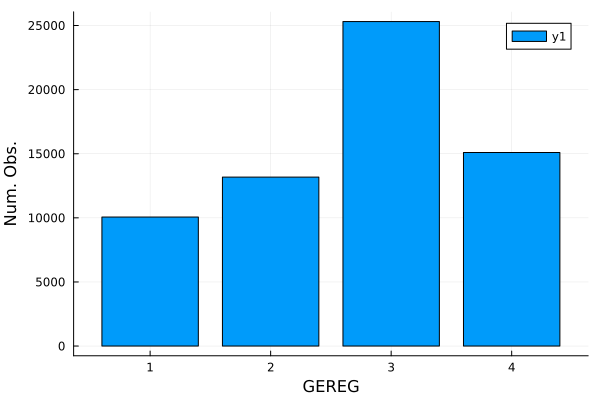

In [14]:
plt_gereg = @pipe cps |>
    groupby(_, :GEREG) |>
    combine(_, :TRATUSR => length => :num_obs) |>
    bar(_[:,:GEREG], _[:,:num_obs])

xlabel!(plt_gereg, "GEREG")
ylabel!(plt_gereg, "Num. Obs.")
xaxis!(plt_gereg, formatter = :plain)

The labels for `GEREG` are:
- 1 => "Northeast"
- 2 => "Midwest"
- 3 => "South"
- 4 => "West"

Regions are _very_ high level. We'd more likely prefer to use state definitions.

Shout out to [dantonnoriega](https://gist.github.com/dantonnoriega) for providing a CSV of the state FIPS codes.

BLS provides county and MSA codes as CSV. Both of these are available in the `./data` directory.

In [15]:
STATE_CODE_CSV = joinpath("data","us-state-ansi-fips.csv");

# Import and clean state code data.
state_codes = DataFrame(CSV.File(STATE_CODE_CSV));
rename!(state_codes, " st" => :GESTFIPS)
rename!(state_codes, " stusps" => :state_abbr)
transform!(state_codes, :state_abbr => (x -> lstrip.(x)) => :state_abbr)

describe(state_codes)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,stname,,Alabama,,Wyoming,0,String31
2,GESTFIPS,28.9608,1,29.0,56,0,Int64
3,state_abbr,,AK,,WY,0,String3


Now let's join this baby to our `cps` data!

In [16]:
cps = leftjoin(cps,state_codes, on = :GESTFIPS);
describe(cps[!,[:GESTFIPS]])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,Union
1,GESTFIPS,27.6538,1,27.0,56,0,"Union{Missing, Int64}"


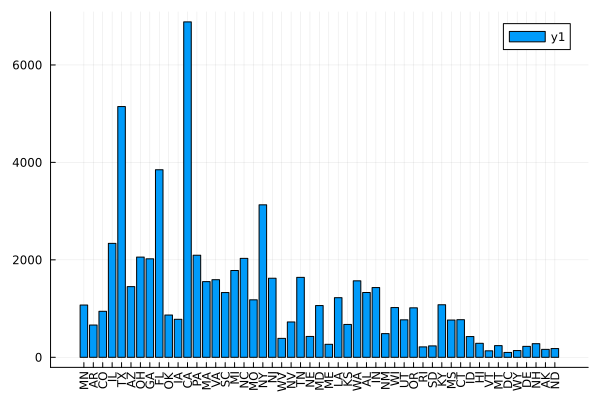

In [17]:
@pipe cps |>
    groupby(_, :state_abbr) |>
    combine(_, :TRATUSR => length => :num_obs) |>
    bar(_[:,:state_abbr], _[:, :num_obs], xticks = :all, xrotation = 90)

_What does this tell us?_

![Heatmaps](https://imgs.xkcd.com/comics/heatmap.png)

_Basically, nothing._

But this will be a useful input. Given a user's state, what are they doing at the moment.

The more specific CBSA (I've been mistakenly calling it MSA) _may_ be useful. But if there's like one person per MSA then it won't provide that much information. Let's see what the counts look like for that `GTCBSA` field.

In [18]:
CBSA_CODE_CSV_URL = "https://data.nber.org/cbsa-csa-fips-county-crosswalk/cbsa2fipsxw.csv";

# Import and clean CBSA data.
cbsa_codes = DataFrame(CSV.File(HTTP.get(CBSA_CODE_CSV_URL).body));
delete!(cbsa_codes,1)    # The first row is blank.
rename!(cbsa_codes, :cbsacode => :GTCBSA)


describe(cbsa_codes)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Union
1,GTCBSA,29813.9,10100,30400.0,49820,0,"Union{Missing, Int64}"
2,metrodivisioncode,33867.1,11244,35614.0,48864,1769,"Union{Missing, Int64}"
3,csacode,337.025,104,346.0,566,668,"Union{Missing, Int64}"
4,cbsatitle,,"Aberdeen, SD",,"Zapata, TX",0,"Union{Missing, String}"
5,metropolitanmicropolitanstatis,,Metropolitan Statistical Area,,Micropolitan Statistical Area,0,"Union{Missing, String31}"
6,metropolitandivisiontitle,,"Anaheim-Santa Ana-Irvine, CA",,"Wilmington, DE-MD-NJ",1769,"Union{Missing, String}"
7,csatitle,,"Albany-Schenectady, NY",,"Youngstown-Warren, OH-PA",668,"Union{Missing, String}"
8,countycountyequivalent,,Abbeville County,,Zapata County,0,"Union{Missing, String31}"
9,statename,,Alabama,,Wyoming,0,"Union{Missing, String31}"


In [19]:
# Convert `cps.GTCBSA = 0` to missing.
replace!(cps.GTCBSA, 0=>missing)


63645-element Vector{Union{Missing, Int64}}:
      missing
 38220
 38220
      missing
 40420
 40420
 40420
 41700
 38060
 38060
     ⋮
 16980
      missing
      missing
      missing
      missing
 16700
 16700
 16700
 16700

In [20]:
# Finally, join in the data.
cps = leftjoin(cps, cbsa_codes[:,[:GTCBSA, :csatitle]], on = :GTCBSA, matchmissing = :equal);

In [21]:
@pipe cps |>
    select(_, :csatitle) |>
    describe(_,:nmissing)

Row,variable,nmissing
,Symbol,Int64
1,csatitle,39566


There are 39,566 missing `csatitle` values.

In [22]:
39566/nrow(cps)

0.09575832675840905

That's 9.6% of the data. Not ideal but workable. Let's see the count list.

In [23]:
@pipe cps |>
    groupby(_, :csatitle) |>
    combine(_, :TRATUSR => length => :num_obs) |>
    sort(_,:num_obs)

Row,csatitle,num_obs
,String?,Int64
1,"Wausau-Stevens Point-Wisconsin Rapids, WI",19
2,"Johnstown-Somerset, PA",26
3,"Saginaw-Midland-Bay City, MI",32
4,"Bloomington-Bedford, IN",42
5,"Erie-Meadville, PA",50
6,"Midland-Odessa, TX",52
7,"Modesto-Merced, CA",53
8,"Greenville-Washington, NC",59
9,"Bend-Redmond-Prineville, OR",59


When you exclude `missing`, the lowest cardinality category is `Wausau-Stevens Point-Wisconsin Rapids, WI` with 19 observations.

That's not bad!!! I think there's enough information in this field to use it in a model.

Next, let's take a look at income categories -- `HEFAMINC`.

In [24]:
HEFAMINC_replacement_dict = Dict(
    1 => "Less than 5,000",
    2 => "5,000 to 7,499",
    3 => "7,500 to 9,999",
    4 => "10,000 to 12,499",
    5 => "12,500 to 14,999",
    6 => "15,000 to 19,999",
    7 => "20,000 to 24,999",
    8 => "25,000 to 29,999",
    9 => "30,000 to 34,999",
    10 => "35,000 to 39,999",
    11 => "40,000 to 49,999",
    12 => "50,000 to 59,999",
    13 => "60,000 to 74,999",
    14 => "75,000 to 99,999",
    15 => "100,000 to 149,999",
    16 => "150,000 and over"
);

In [25]:
cps.HEFAMINC_lbl = map(code_int -> HEFAMINC_replacement_dict[code_int], cps.HEFAMINC);
# unique(cps.HEFAMINC_lbl)

413186-element Vector{String}:
 "20,000 to 24,999"
 "20,000 to 24,999"
 "20,000 to 24,999"
 "20,000 to 24,999"
 "20,000 to 24,999"
 "20,000 to 24,999"
 "35,000 to 39,999"
 "35,000 to 39,999"
 "35,000 to 39,999"
 "35,000 to 39,999"
 ⋮
 "60,000 to 74,999"
 "60,000 to 74,999"
 "60,000 to 74,999"
 "60,000 to 74,999"
 "15,000 to 19,999"
 "60,000 to 74,999"
 "60,000 to 74,999"
 "60,000 to 74,999"
 "60,000 to 74,999"

In [26]:
ordered_keys = sort([k for k in keys(HEFAMINC_replacement_dict)]);
HEFAMINC_levels = [HEFAMINC_replacement_dict[k] for k in ordered_keys];
cps.HEFAMINC_lbl = categorical(cps.HEFAMINC_lbl, levels=HEFAMINC_levels, ordered=true);
# unique(cps.HEFAMINC_lbl)


413186-element CategoricalArray{String,1,UInt32}:
 "20,000 to 24,999"
 "20,000 to 24,999"
 "20,000 to 24,999"
 "20,000 to 24,999"
 "20,000 to 24,999"
 "20,000 to 24,999"
 "35,000 to 39,999"
 "35,000 to 39,999"
 "35,000 to 39,999"
 "35,000 to 39,999"
 ⋮
 "60,000 to 74,999"
 "60,000 to 74,999"
 "60,000 to 74,999"
 "60,000 to 74,999"
 "15,000 to 19,999"
 "60,000 to 74,999"
 "60,000 to 74,999"
 "60,000 to 74,999"
 "60,000 to 74,999"

In [27]:
smry_hefaminc = @pipe cps |>
    groupby(_, :HEFAMINC_lbl) |>
    combine(_, :TRATUSR => length => :num_obs)

Row,HEFAMINC_lbl,num_obs
,Cat…,Int64
1,"Less than 5,000",6305
2,"5,000 to 7,499",3249
3,"7,500 to 9,999",4587
4,"10,000 to 12,499",6218
5,"12,500 to 14,999",5470
6,"15,000 to 19,999",11216
7,"20,000 to 24,999",15948
8,"25,000 to 29,999",16739
9,"30,000 to 34,999",18349


This looks surprisingly over-sampled on the high income levels. Let's look at a plot.

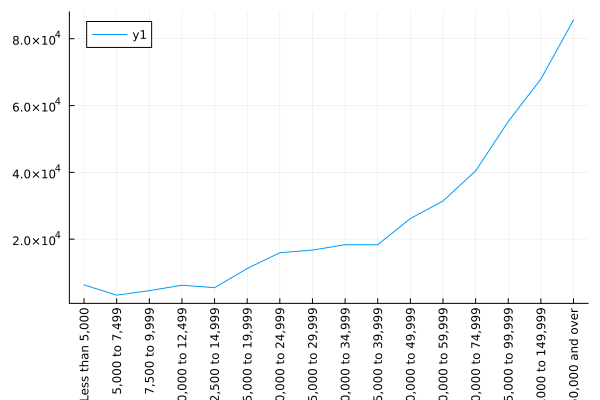

In [28]:
plt_hefaminc = plot(smry_hefaminc.HEFAMINC_lbl, smry_hefaminc.num_obs, xrotation = 90)


We would expect to see a more lognormal distribution -- very few small income levels but a peak somewhere in the middle.

To be fair, it's weird to have <\$10k in income. But I wouldn't expect the \$150k+ group to have more obzervations than the \$60k to \$75k group.

Regardless, there's plenty of information here. We can easily make use of this field as a predictor.

Let's take a look at `HETENURE`, which tells us if someone owns (1), rents (2), or occupies without payment of cash rent (3).

In [29]:
@pipe cps |>
    groupby(_, :HETENURE) |>
    combine(_, :TRATUSR => length => :num_obs)

Row,HETENURE,num_obs
,Int64?,Int64
1,1,280867
2,2,128715
3,3,3604


A decet coverage of each. This will probably be more useful as a homeowner/non-homeowner split. So we'll combine `2` and `3` later on.

The last one we'll look at is `HRHTYPE`, which tells us the household type (e.g. family, individual). There are a lot of options, but we'll probably end up mapping 1-5 and 9 as living with  family, 6-8 and 10 as not living with family.

In [30]:
sum(ismissing.(cps.HRHTYPE))

0

None are missing.

In [31]:
clean_hrhtype = (x -> ((x <= 5) | (x == 9) ? "Family" : "Non-family"))    # Simple ternary operator function. Will broadcast below.

@pipe cps |>
    transform(_, :HRHTYPE => (x -> clean_hrhtype.(x)) => :HRHTYPE_label) |>
    groupby(_, :HRHTYPE_label) |>
    combine(_, :TRATUSR => length => :num_obs)

Row,HRHTYPE_label,num_obs
,String,Int64
1,Family,352837
2,Non-family,60349


In [32]:
Lake 20%-ish are non-family living situations.

ErrorException: syntax: extra token "20" after end of expression

We can also look at `PEMARITL`, which tells us if someone is married. This may actually be a more useful field. Usually people give their marital status but not, e.g., if they live in a group home.

This field is only valid for respondents age 15+. Let's see if there are missing field flags.

In [33]:
unique(cps.PEMARITL)

7-element Vector{Union{Missing, Int64}}:
 1
 6
 4
  missing
 5
 2
 3

Looks like missing is already taken care of. Let's re-map to 1-2 = Married, 3+ = single.

In [35]:
clean_pemaritl = x -> !ismissing(x) ? (x <= 2 ? "Married" : "Not married") : "Not married" # Double terniary to handle missing. Not pretty but works.
# The above logic assumes that if you're missing (i.e. < 15 years old) you are not married.

@pipe cps |>
    transform(_, :PEMARITL => (x -> clean_pemaritl.(x)) => :PEMARITL_label) |>
    groupby(_, :PEMARITL_label) |>
    combine(_, :TRATUSR => length => :num_obs)

Row,PEMARITL_label,num_obs
,String,Int64
1,Married,169135
2,Not married,244051


Mostly non-married.

### Which variables do we want to use?

Our model API will take some basid demographic inputs and produce a vector of probabilities that map to 

So we've looked at a few variables so far:
- `HETENURE`: Whether someone rents or owns.
- `PEMARITL`: Marital status.
- `HEFAMINC`: Household income bracket.
- `GTCBSA` => `csatitle`: CBSA (metropolitan area) with a label mapping.
    - This one may be difficult to implement, since people probably don't know the exact name of the metropolitan area. There would have to be a fuzzy search or lookup feature.
    - This is extremely useful, but maybe not worth including in an MVP.
- `GESTFIPS` => `state_abbr`: U.S. State FIPS code and associated abbreviation.
- `PRTAGE`: The person's age. I didn't look at this above, but it's basic and straightforward enough.

So here's roughly how the app will work:
1. The user specifies `PRTAGE`, `HETENURE`, `PEMARITL`, `GESTFIPS`, `HEFAMINC`.
2. The user specifies a time of day.
3. The model returns a simplex vector of activity probabilities representing how likely each user is to be performing said activity at the given point in time.

This means the next part of the analysis is to look at activities at a given point in time.

## Activity Analysis

The main data file we'll need is the ATUS Activity File.

> The Activity file contains information about how ATUS respondents spent their diary day. It includes information such as activity codes, activity start and stop times, and locations.

Let's download it.

In [36]:
act2021 = download_atus_data("act",2021);
describe(act2021)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,TUCASEID,2.02106e13,20210101210037,2.02106e13,20211212212591,0,Int64
2,TUACTIVITY_N,11.0602,1,10.0,67,0,Int64
3,TEWHERE,3.27867,-1,1.0,89,0,Int64
4,TRTCCTOT_LN,5.92482,0,0.0,785,0,Int64
5,TRTCC_LN,4.65899,-1,-1.0,720,0,Int64
6,TRTCOC_LN,0.717586,0,0.0,785,0,Int64
7,TRTEC_LN,-0.458972,-1,-1.0,740,0,Int64
8,TRTHH_LN,4.63804,-1,-1.0,720,0,Int64
9,TRTNOHH_LN,-0.637941,-1,-1.0,660,0,Int64


Here's the brief description of the table.

> This file includes activity-level information collected in ATUS, including activity code, location, duration, activity start and stop times, whether respondents had a child under 13 in their care during the activity, and whether the activity was identified as eldercare. Location (or “where”) information is not collected for some selected activities (such as sleeping and grooming); a value that indicates the activity was “out of universe” for the “where” question (-1) is filled in these situations.

The five most important record identification fields are:
- `TUCASEID`: The index id for the respondent case.
- `TUACTIVITY_N`: The ordinal activitiy record. The first activity is 1.
- `TUSTARTTIM`: The time that the activity started.
- `TUSTOPTIME`: The time that the activity stopped.

The activities themselves are encoded according to [this lexicon](https://www.bls.gov/tus/lexicons/lexiconnoex2021.pdf).

The fields for activities are given (as integers):
- `TUTIER1CODE`: The most general activity category (e.g. "Personal Care").
- `TUTIER2CODE`: A more granular activity code (e.g. "Personal Care, Housework").
- `TUTIER2CODE`: The most granular activity code (e.g. "Personal Care, Housework, Laundry")
- `TRCODE`: The concatenation of all three above codes.
- `TRTIER2`: The concatenation of the tier 1 and tier 2 codes.

The `TUTIER2CODE` Is probably as granular as we need. An example of an over-granular tier 3 code is `TIERCODE = 020302` which is "Household Activities; Interior maintenance, repair, & decoration; Building and repairing furniture".

I don't think we need to know if people are building furniture. But it's worth knowing that they're doing interior maintenance household activities.

In [37]:
act = copy(act2021);
act_main_cols = [:TUCASEID, :TUACTIVITY_N, :TUSTARTTIM, :TUSTOPTIME];
first(act[!, act_main_cols], 10)

Row,TUCASEID,TUACTIVITY_N,TUSTARTTIM,TUSTOPTIME
,Int64,Int64,Time,Time
1,20210101210037,1,04:00:00,06:00:00
2,20210101210037,2,06:00:00,07:15:00
3,20210101210037,3,07:15:00,07:30:00
4,20210101210037,4,07:30:00,16:30:00
5,20210101210037,5,16:30:00,16:45:00
6,20210101210037,6,16:45:00,22:30:00
7,20210101210037,7,22:30:00,06:00:00
8,20210101210081,1,04:00:00,09:00:00
9,20210101210081,2,09:00:00,09:15:00


Here we can see data for `TUCASEID = 20210101210037`, the first activity starts at 4AM and ends at 6AM. The next one starts at 6AM and ends at 7:15.

Let's see all the activities for a random `TUCASEID`.

In [38]:
using StatsBase

In [39]:
sample(tucaseid_set, 1)[1]

UndefVarError: UndefVarError: tucaseid_set not defined

In [40]:
tucaseid_set = unique(act.TUCASEID);
sample_case = sample(tucaseid_set,1)[1]
act[act.TUCASEID .== sample_case,act_main_cols]

Row,TUCASEID,TUACTIVITY_N,TUSTARTTIM,TUSTOPTIME
,Int64,Int64,Time,Time
1,20210504211694,1,04:00:00,07:30:00
2,20210504211694,2,07:30:00,07:40:00
3,20210504211694,3,07:40:00,07:50:00
4,20210504211694,4,07:50:00,08:00:00
5,20210504211694,5,08:00:00,09:15:00
6,20210504211694,6,09:15:00,09:37:00
7,20210504211694,7,09:37:00,17:37:00
8,20210504211694,8,17:37:00,17:52:00
9,20210504211694,9,17:52:00,19:15:00


There are a few things worth noting here.
- The record ranges are mutually exclusive. This is important, since we feed it a time and use filtering to find the relative cases.
- The first record starts at 4AM. We should see if this is always true.
- The last case ends at 5:30AM, presumably the next day. We'll want to find a way to cut off the last record so it is no later than 4AM.

In [41]:
# Checking if 4AM is the minimum for all records.
@pipe act |>
    filter(:TUACTIVITY_N => (t -> t == 1), _) |>
    groupby(_, :TUSTARTTIM) |>
    combine(_, :TUCASEID => length => :num_cases)

Row,TUSTARTTIM,num_cases
,Time,Int64
1,04:00:00,9087


It looks like all 9,087 cases start at 4AM. What about the last time?

In [42]:
maximum(act.TUACTIVITY_N)

67

In [43]:
@pipe act |>
    groupby(_, :TUCASEID) |>
    transform(_, :TUACTIVITY_N => (i -> maximum(i)) => :last_case_n) |>    # Add a field with the maximum TUACTIVITY_N value for each respondent.
    # Note that `transform` returns a ungrouped DataFrame.
    filter((row -> row.TUACTIVITY_N == row.last_case_n), _) |>    # Just the last activity entries.
    groupby(_, :TUSTOPTIME) |>
    combine(_, :TUCASEID => length => :num_cases)|>
    sort(_, :TUSTOPTIME)

Row,TUSTOPTIME,num_cases
,Time,Int64
1,04:00:00,611
2,04:01:00,3
3,04:04:00,2
4,04:05:00,7
5,04:07:00,1
6,04:10:00,14
7,04:11:00,2
8,04:12:00,1
9,04:13:00,1


There are lots of stop times. Most are at 4AM. But there are plenty that are not that. For instance, there are 3 records with a stop time of 18:30:00. What does this mean? What happens after 18:30 on those days?

In [44]:
Time("18:00:00")

18:00:00

In [45]:
@pipe act |>
    groupby(_, :TUCASEID) |>
    transform(_, :TUACTIVITY_N => (i -> maximum(i)) => :last_case_n) |>    # Add a field with the maximum TUACTIVITY_N value for each respondent.
    # Note that `transform` returns a ungrouped DataFrame.
    filter((row -> row.TUACTIVITY_N == row.last_case_n), _) |>    # Just the last activity entries.
    filter(:TUSTOPTIME => x -> x == Time("18:00:00"), _)    # Filter to the cases where the last time is 18:00:00.

Row,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,TRTONHH_LN,TRTO_LN,TUACTDUR,TUACTDUR24,TUCC5,TUCC5B,TUCC7,TUCC8,TUCUMDUR,TUCUMDUR24,TUDURSTOP,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE,TRWBELIG,last_case_n
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Time,Time,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,20210705210976,14,-1,0,-1,0,-1,-1,-1,-1,-1,-1,1230,390,0,0,0,-3,2280,1440,2,-1,21:30:00,18:00:00,1,1,1,10101,101,0,0,14
2,20210706210220,12,-1,0,-1,0,-1,-1,-1,-1,-1,-1,1100,260,0,0,0,0,2280,1440,2,-1,23:40:00,18:00:00,1,1,1,10101,101,0,0,12
3,20210706211693,20,-1,0,0,0,-1,0,-1,0,-1,0,1185,345,1,0,0,0,2280,1440,2,-1,22:15:00,18:00:00,1,1,1,10101,101,0,0,20


In these cases, the start time is before the stop time, meaning this goes until 18:00:00 the next day (which doesn't seem right.)

Let's look specifically at cases where the start time is later than the stop time. I'm going to call these "spillover" records since the activities seem to spill over into the next day.

In [46]:
@pipe act |>
    filter([:TUSTARTTIM, :TUSTOPTIME] => (start, stop) -> start > stop, _) |>
    first(_,20)

Row,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,TRTONHH_LN,TRTO_LN,TUACTDUR,TUACTDUR24,TUCC5,TUCC5B,TUCC7,TUCC8,TUCUMDUR,TUCUMDUR24,TUDURSTOP,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE,TRWBELIG
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Time,Time,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,20210101210037,7,-1,0,-1,0,-1,-1,-1,-1,-1,-1,450,330,0,0,0,0,1560,1440,2,-1,22:30:00,06:00:00,1,1,1,10101,101,0,-1
2,20210101210081,20,1,60,60,0,-1,60,-1,60,-1,60,330,330,1,0,0,0,1200,1200,2,-1,18:30:00,00:00:00,12,3,3,120303,1203,0,-1
3,20210101210099,14,-1,0,-1,0,-1,-1,-1,-1,-1,-1,570,360,0,0,0,0,1650,1440,2,-1,22:00:00,07:30:00,1,1,1,10101,101,0,-1
4,20210101210101,13,-1,0,-1,0,-1,-1,-1,-1,-1,-1,610,280,0,0,0,0,1770,1440,2,-1,23:20:00,09:30:00,1,1,1,10101,101,0,-1
5,20210101210109,14,-1,0,-1,0,-1,-1,-1,-1,-1,-1,595,355,0,0,0,0,1680,1440,2,-1,22:05:00,08:00:00,1,1,1,10101,101,0,-1
6,20210101210115,9,1,0,0,0,-1,0,0,-1,-1,-1,225,225,0,0,0,0,1200,1200,2,-1,20:15:00,00:00:00,12,3,3,120303,1203,0,-1
7,20210101210131,13,-1,0,-1,0,-1,-1,-1,-1,-1,-1,480,330,0,0,0,0,1590,1440,2,-1,22:30:00,06:30:00,1,1,1,10101,101,0,-1
8,20210101210139,15,-1,0,0,0,-1,0,0,-1,-1,-1,585,315,0,0,0,0,1710,1440,2,-1,22:45:00,08:30:00,1,1,1,10101,101,0,-1
9,20210101210155,9,-1,0,0,0,-1,0,0,-1,-1,-1,660,360,0,0,0,0,1740,1440,2,-1,22:00:00,09:00:00,1,1,1,10101,101,0,-1


Most of these activities have a Tier 1 code of 01, which is sleep. So there are lots of instances where they start sleeping before midnight and wake up after 4AM the next day.

Looking through the data dictionary ([this one](https://www.bls.gov/tus/dictionaries/atusintcodebk21.pdf)), we may be able to use the `TUCUMDUR24` to get an integer for the number of minutes since 4AM (capped at 1440 minutes) that the activity either starts or stops. Let's see if the last activity for every record has a `TUCUMDUR24` value of 1440.

In [47]:
@pipe act |>
    groupby(_, :TUCASEID) |>
    transform(_, :TUACTIVITY_N => (i -> maximum(i)) => :last_case_n) |>    # Add a field with the maximum TUACTIVITY_N value for each respondent.
    # Note that `transform` returns a ungrouped DataFrame.
    filter((row -> row.TUACTIVITY_N == row.last_case_n), _) |>    # Just the last activity entries.
    groupby(_, :TUCUMDUR24) |>
    combine(_, :TUCASEID => length => :num_cases)

Row,TUCUMDUR24,num_cases
,Int64,Int64
1,1440,9087


It does!!! This will be an easier field to work with. But it will require some computation. For each activity record, we can use the `TUCUMDIR24` value and a lag on that value to give the stop time (in minutes) and start time (in minutes) respectively. We'll have to fill the first record with a start time of 0.

In [48]:
act = @pipe act |>
    transform(_, :TUCUMDUR24 => (t -> ShiftedArrays.lag(t, 1, default = 0)) => :start_time_int) |>
    transform(_, :TUCUMDUR24 => :stop_time_int)

Row,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,TRTONHH_LN,TRTO_LN,TUACTDUR,TUACTDUR24,TUCC5,TUCC5B,TUCC7,TUCC8,TUCUMDUR,TUCUMDUR24,TUDURSTOP,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE,TRWBELIG,start_time_int,stop_time_int
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Time,Time,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,20210101210037,1,-1,0,-1,0,-1,-1,-1,-1,-1,-1,120,120,0,0,0,97,120,120,2,-1,04:00:00,06:00:00,1,1,1,10101,101,0,-1,0,120
2,20210101210037,2,1,0,-1,0,-1,-1,-1,-1,-1,-1,75,75,0,0,0,0,195,195,2,-1,06:00:00,07:15:00,50,1,1,500101,5001,0,-1,120,195
3,20210101210037,3,1,0,-1,0,-1,-1,-1,-1,-1,-1,15,15,0,0,0,0,210,210,1,-1,07:15:00,07:30:00,18,5,1,180501,1805,0,-1,195,210
4,20210101210037,4,2,0,-1,0,-1,-1,-1,-1,-1,-1,540,540,0,0,0,0,750,750,2,-1,07:30:00,16:30:00,5,1,1,50101,501,0,-1,210,750
5,20210101210037,5,14,0,-1,0,-1,-1,-1,-1,-1,-1,15,15,0,0,0,0,765,765,1,-1,16:30:00,16:45:00,18,5,1,180501,1805,0,-1,750,765
6,20210101210037,6,1,0,-1,0,-1,-1,-1,-1,-1,-1,345,345,0,0,0,0,1110,1110,2,-1,16:45:00,22:30:00,12,3,1,120301,1203,0,-1,765,1110
7,20210101210037,7,-1,0,-1,0,-1,-1,-1,-1,-1,-1,450,330,0,0,0,0,1560,1440,2,-1,22:30:00,06:00:00,1,1,1,10101,101,0,-1,1110,1440
8,20210101210081,1,-1,0,0,0,-1,0,-1,0,-1,0,300,300,1,0,0,97,300,300,2,-1,04:00:00,09:00:00,1,1,1,10101,101,0,-1,1440,300
9,20210101210081,2,1,15,15,0,-1,15,-1,15,-1,15,15,15,1,0,0,0,315,315,1,-1,09:00:00,09:15:00,2,2,1,20201,202,0,-1,300,315


With this set of fields, we can easily snapshot filter by providing a time integer `t_snap` and filtering to `(t_snap >= start_time_int) & (t_snap < stop_time_int)`.

For convenience, we'll wrap that expression in a function called `between_rx(t, left, right)` -- a between function that is right-exclusive of the given range.

In [49]:
function between_rx(t, left, right)
    return (t >= left) & (t < right)
end

between_rx (generic function with 1 method)

Let's see what everyone was doing at 1PM. This is nine hours after 4AM.

In [50]:
filter([:start_time_int, :stop_time_int] => (start, stop) -> between_rx(9*60, start, stop), act)

Row,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,TRTONHH_LN,TRTO_LN,TUACTDUR,TUACTDUR24,TUCC5,TUCC5B,TUCC7,TUCC8,TUCUMDUR,TUCUMDUR24,TUDURSTOP,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE,TRWBELIG,start_time_int,stop_time_int
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Time,Time,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,20210101210037,4,2,0,-1,0,-1,-1,-1,-1,-1,-1,540,540,0,0,0,0,750,750,2,-1,07:30:00,16:30:00,5,1,1,50101,501,0,-1,210,750
2,20210101210081,7,7,150,150,0,-1,150,-1,150,-1,150,150,150,1,0,0,0,600,600,2,-1,11:30:00,14:00:00,50,1,1,500101,5001,0,-1,450,600
3,20210101210099,7,2,0,-1,0,-1,-1,-1,-1,-1,-1,385,385,0,0,0,0,720,720,2,-1,09:35:00,16:00:00,5,1,1,50101,501,0,-1,335,720
4,20210101210101,3,1,0,-1,0,-1,-1,-1,-1,-1,-1,180,180,0,0,0,0,600,600,2,-1,11:00:00,14:00:00,5,4,1,50401,504,0,-1,420,600
5,20210101210109,4,1,0,-1,0,-1,-1,-1,-1,-1,-1,210,210,0,0,0,0,720,720,2,-1,12:30:00,16:00:00,12,3,7,120307,1203,0,-1,510,720
6,20210101210115,3,1,0,0,0,-1,0,0,-1,-1,-1,45,45,0,0,0,0,555,555,1,-1,12:30:00,13:15:00,11,1,1,110101,1101,0,-1,510,555
7,20210101210131,8,12,0,-1,0,-1,-1,-1,-1,-1,-1,30,30,0,0,0,0,545,545,1,-1,12:35:00,13:05:00,18,12,1,181201,1812,0,-1,515,545
8,20210101210139,8,7,0,0,0,-1,0,0,-1,-1,-1,120,120,0,0,0,0,645,645,1,-1,12:45:00,14:45:00,7,1,4,70104,701,0,-1,525,645
9,20210101210155,3,1,0,0,0,-1,0,0,-1,-1,-1,120,120,0,0,0,0,660,660,1,-1,13:00:00,15:00:00,6,3,1,60301,603,0,-1,540,660


Let's create a function that processes the original activity file, pulling just the fields we need and creating the integer times.

In [51]:
"""
    clean_activity_df(x[, y])

Takes a DataFrame of the ATUS activity file.

Returns a copy of that DataFarme with a subset of columns and adds two additional view columns:
- `start_time_int`: The integer number of minutes from 4AM when the activity started. This is a lag of `TUCUMDUR24` (defaults to for the first activity).
- `stop_time_int`: The integer number of minutes from 4AM when the activity stopped. This is a pointer to `TUCUMDUR24`.
"""
function clean_activity_df(activity_df)
    want_cols = [:TUCASEID, :TUACTIVITY_N, :TUSTARTTIM, :TUSTOPTIME, :TUACTDUR24, :TUCUMDUR24, :TUTIER1CODE, :TUTIER2CODE, :TRTIER2]
    out_df = activity_df[:, want_cols]    # using `:` instead of `!` to make a copy.
    sort!(out_df, [:TUCASEID, :TUACTIVITY_N])
    grouped_out_df = groupby(out_df, :TUCASEID)
    transform!(grouped_out_df, :TUCUMDUR24 => (t -> ShiftedArrays.lag(t, 1, default = 0)) => :start_time_int)
    transform!(out_df, :TUCUMDUR24 => :stop_time_int)
    return out_df
end

clean_activity_df

In [52]:
act = clean_activity_df(act2021);
first(act,10)

Row,TUCASEID,TUACTIVITY_N,TUSTARTTIM,TUSTOPTIME,TUACTDUR24,TUCUMDUR24,TUTIER1CODE,TUTIER2CODE,TRTIER2,start_time_int,stop_time_int
,Int64,Int64,Time,Time,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,20210101210037,1,04:00:00,06:00:00,120,120,1,1,101,0,120
2,20210101210037,2,06:00:00,07:15:00,75,195,50,1,5001,120,195
3,20210101210037,3,07:15:00,07:30:00,15,210,18,5,1805,195,210
4,20210101210037,4,07:30:00,16:30:00,540,750,5,1,501,210,750
5,20210101210037,5,16:30:00,16:45:00,15,765,18,5,1805,750,765
6,20210101210037,6,16:45:00,22:30:00,345,1110,12,3,1203,765,1110
7,20210101210037,7,22:30:00,06:00:00,330,1440,1,1,101,1110,1440
8,20210101210081,1,04:00:00,09:00:00,300,300,1,1,101,0,300
9,20210101210081,2,09:00:00,09:15:00,15,315,2,2,202,300,315


Let's create another convenience function that converts the time into the integer minutes since 4AM.

In [53]:
Minute((Time("3:59:00") - Dates.Hour(4)) - Time("00:00:00")).value

1439

**NEED TO FIX THE `time_to_atus_int` so that it accounts for e.g. 2AM and non-minute inputs.**

In [54]:
"""
    time_to_atus_int(t::Dates.Time)::Int

Converts a timestamp to the integer time in minutes since 4AM.

If a value before 4AM is provided (e.g. 3AM) then the minutes between 4AM and that time the following day is provided.
"""
function time_to_atus_int(t::Dates.Time)::Int
    start_of_day = Dates.Time("00:00:00")
    shifted_t = t - Dates.Hour(4)
    return floor(shifted_t - start_of_day, Dates.Minute).value
    #return Dates.Minute(shifted_t - start_of_day).value
    #return convert(Dates.Minute, t - start_of_day).value
end

time_to_atus_int

Finally, we'll make a custom filtering function for filtering the data frame. This combines a lot of the functions above.

In [55]:
"""
    snapshot_filter(snap_t::Union{Int,Dates.Time}, df::DataFrame)::DataFrame

Filter an ATUS activity DataFrame to the activities that occurred during the snapshot time.

# Arguments
- `snap_t`: Either a Time object or an integer representing the number of minutes since 4AM.
- `df`: A DataFrame with the ATUS activity data. Must include `:start_time_int` and `:stop_time_int` columns.

"""
function snapshot_filter(snap_t::Union{Int,Dates.Time}, df::DataFrame)::DataFrame
    snap_t_int = isa(snap_t, Dates.Time) ? time_to_atus_int(snap_t) : snap_t

    filter([:start_time_int, :stop_time_int] => (start, stop) -> between_rx(snap_t_int, start, stop), df)
end

snapshot_filter

Let's take a look at the distribution of activities happening at 5AM.

In [56]:
names(act)

11-element Vector{String}:
 "TUCASEID"
 "TUACTIVITY_N"
 "TUSTARTTIM"
 "TUSTOPTIME"
 "TUACTDUR24"
 "TUCUMDUR24"
 "TUTIER1CODE"
 "TUTIER2CODE"
 "TRTIER2"
 "start_time_int"
 "stop_time_int"

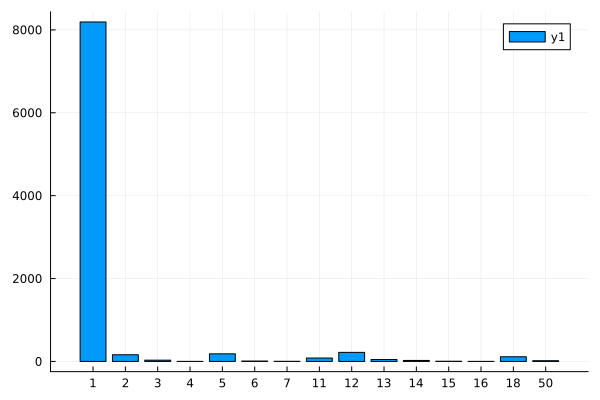

In [57]:
@pipe act |>
    snapshot_filter(Time("5:00:00"), _) |>
    groupby(_, :TUTIER1CODE) |>
    combine(_, nrow => :num_cases) |>
    transform(_, :TUTIER1CODE => (i -> string.(i)) => :TUTIER1CODE) |>
    bar(_[!, :TUTIER1CODE], _[!, :num_cases])

A value of 1 is personal care, which includes sleeping. A value of 2 is household activities. A value of 12 is socializing, relaxing, and leisure. A value of 18 is traveling.

Let's compare snapshots at 4AM, 7AM, 10AM, 1PM, 4PM, 7PM, 10PM, 1AM.

In [58]:
snaps = Time.(["4:00", "7:00", "10:00", "13:00", "19:00", "1:00"])

snaps_df = similar(act, 0)    # A copy of the dataframe with zero rows.
snaps_df.snap_val = Time[]

for snap in snaps
    snapped = snapshot_filter(snap, act)
    snapped.snap_val .= snap
    append!(snaps_df, snapped, promote=false)
end


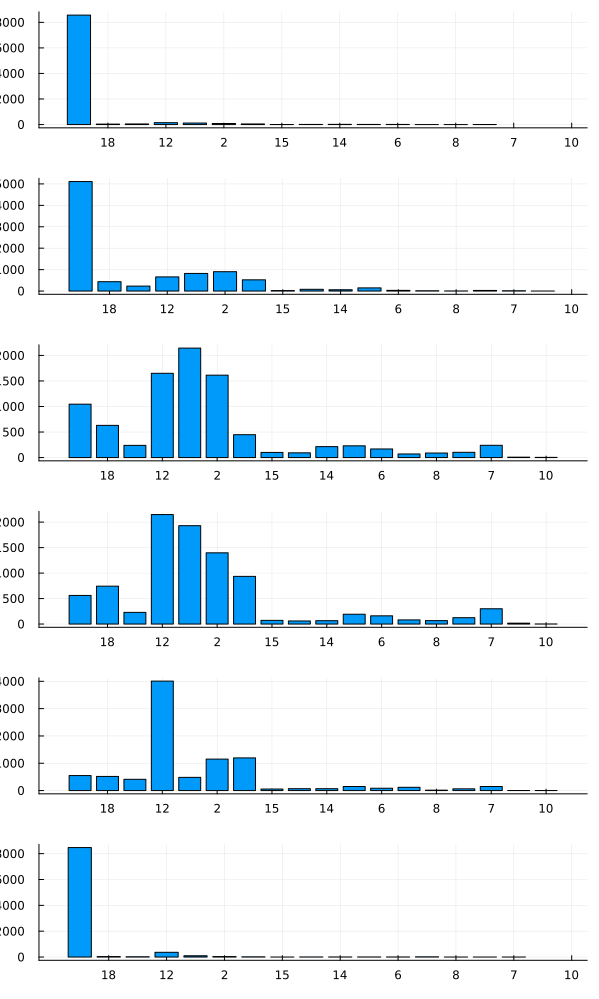

In [59]:
@pipe snaps_df |>
    groupby(_, [:snap_val, :TUTIER1CODE]) |>
    combine(_, nrow) |>
    unstack(_, :snap_val, :nrow) |>
    transform(_, :TUTIER1CODE => (x -> string.(x)) => :TUTIER1CODE) |>
    bar(_.TUTIER1CODE,Matrix(_[:,2:7]), 
        layout = (6,1), 
        size=(600,1000), 
        legend=false)

We can see people are mostly sleeping at 4AM. Some start waking up at 7AM. By 10AM the activities have shifted to daytime activities.

The target variable I think we want is `TRTIER2`. We'll need to decompose it into an indicator matrix.

I think we're about ready to create the sample data. We'll need to take a bunch of snapshots of individuals at different times of day. This will give us a time predictor, the demographic predictors, we'll have to join in day of the week from the respondent file too.

In [61]:
names(act)

11-element Vector{String}:
 "TUCASEID"
 "TUACTIVITY_N"
 "TUSTARTTIM"
 "TUSTOPTIME"
 "TUACTDUR24"
 "TUCUMDUR24"
 "TUTIER1CODE"
 "TUTIER2CODE"
 "TRTIER2"
 "start_time_int"
 "stop_time_int"

So what will our model dataframe look like?
- `TRTIER2`: **Target Variable**. _Source: activity file._ This is the tier 2 activity code.
- `TUDIARYDAY`: _Source: Respondent file._ The day of week when the activity was recorded.
- `GESTFIPS`: _Source: CPS file._ The U.S. state where the respondent resides. This will probably be the geographic variable for the MVP.
- `GTCBSA`: The metropolitan area where the respondent resides. This may not be used in the MVP, but it's FAR more specific and probably more useful. Mostly, it's hard to implement.
- `HEFAMINC`: The household income of the respondent.
- `PEMARITL`: The marital status of the respondent.
- `HETENURE`: The rent/own status of the respondent.
- `PRTAGE`: The age of the respondent.

What we need now is a function that does the following:
1. Import the data files where this info comes from.
2. Filter to just the records and columns we want.
3. Combine the data.
4. Export the DataFrame as a file.

Point four is important because **this will be our first API response!** The source data is small enough that we can just spit it back upon request. And if we can do that...well why the hell not!